In [6]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


# Set the random seed
np.random.seed(1337)

In [7]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  "./painting_styles/",
  label_mode = "categorical",
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=1337,
  image_size=(100, 100),
  batch_size=64)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "./painting_styles/",
  label_mode = "categorical",
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=1337,
  image_size=(100, 100),
  batch_size=64)

# Create the test split (10% of the total data, 50% of the validation data)
validation_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((1*validation_batches) // 2)
val_ds = val_ds.skip((1*validation_batches) // 2)



Found 3915 files belonging to 16 classes.
Using 3132 files for training.
Found 3915 files belonging to 16 classes.
Using 783 files for validation.


['Abstract-Expressionism', 'Baroque', 'Contemporary-Realism', 'Cubism', 'Expressionism', 'Fauvism', 'Impressionism', 'Naïve-Art-(Primitivism)', 'Neo-Expressionism', 'Neo-Figurative-Art', 'Neoclassicism', 'Northern-Renaissance', 'Post-Impressionism', 'Surrealism', 'Synthetic-Cubism', 'Tenebrism']


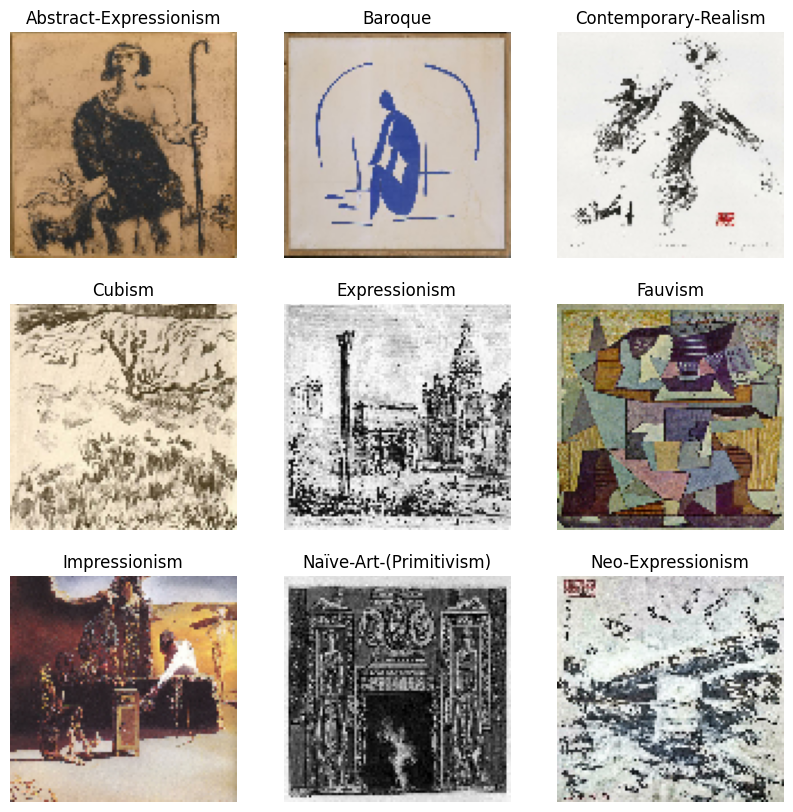

In [8]:
class_names = train_ds.class_names
print(class_names)

# Print samople images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [9]:
from tensorflow.keras import layers

# Implement data augmentation. Used to combat overfitting
image_augmentation = tf.keras.Sequential([
    # Randomly flip the image horizontally and vertically
    layers.RandomFlip("horizontal"),
    
    
])



In [10]:

# Include this to remove annoying warning logs
tf.get_logger().setLevel('ERROR')

# Create the CNN model
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  image_augmentation,
  tf.keras.layers.Conv2D(64, 3, padding="same", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.L2(0.001), activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.L2(0.001), activation='softmax'),
  
])

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)



Epoch 1/10
49/49 [==============================] - 23s 356ms/step - loss: 2.7331 - accuracy: 0.1571 - val_loss: 2.4161 - val_accuracy: 0.2256
Epoch 2/10
49/49 [==============================] - 19s 347ms/step - loss: 2.4135 - accuracy: 0.2484 - val_loss: 2.2321 - val_accuracy: 0.3208
Epoch 3/10
49/49 [==============================] - 18s 330ms/step - loss: 2.2267 - accuracy: 0.3119 - val_loss: 2.1195 - val_accuracy: 0.3960
Epoch 4/10
49/49 [==============================] - 17s 312ms/step - loss: 2.0883 - accuracy: 0.3624 - val_loss: 1.9888 - val_accuracy: 0.4010
Epoch 5/10
49/49 [==============================] - 18s 310ms/step - loss: 1.9431 - accuracy: 0.4160 - val_loss: 1.8547 - val_accuracy: 0.4461
Epoch 6/10
49/49 [==============================] - 17s 313ms/step - loss: 1.8165 - accuracy: 0.4521 - val_loss: 1.8659 - val_accuracy: 0.4612
Epoch 7/10
49/49 [==============================] - 19s 353ms/step - loss: 1.7551 - accuracy: 0.4761 - val_loss: 1.9157 - val_accuracy: 0.4336

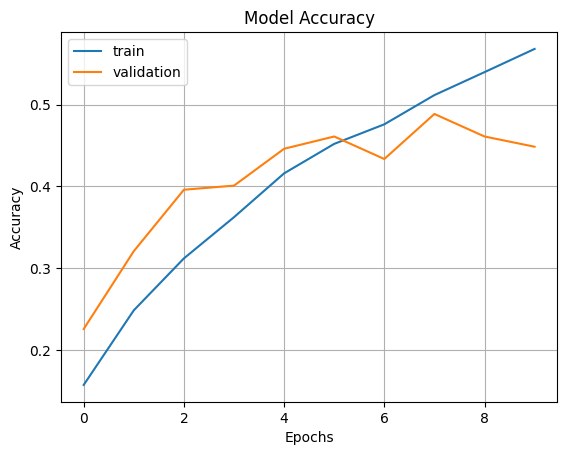

In [11]:
# Plot the model accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()



In [12]:
# Print the test scores
score = model.evaluate(test_ds.take(-1), batch_size=36)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

6/6 [==============================] - 4s 229ms/step - loss: 1.8758 - accuracy: 0.4609
Test loss: 1.8757845163345337
Test accuracy: 0.4609375
